 - site: https://www.kaggle.com/c/bike-sharing-demand
 - EDA: https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile 

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [282]:
test_df = pd.read_csv("./data_Bike Sharing Demand/test.csv", parse_dates=["datetime"]) 
#parse dates는 string으로 되있는 date를 date type으로 바꿔줌 
train_df = pd.read_csv("./data_Bike Sharing Demand/train.csv", parse_dates=["datetime"])

In [283]:
all_df = pd.concat((train_df, test_df), axis=0)
all_df.iloc[[6114]]
# 합치는 이유는 스케일링이나 피쳐에 변화를 줄 때 두번 쓰는 것보단 한번에 처리하기 위해서

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
6114,2012-02-11,1,0,0,2,12.3,15.15,70,8.9981,3.0,50.0,53.0


In [284]:
all_df = pd.concat((train_df, test_df), axis=0).reset_index() # index가 중복되므로 rest_index 해줘야함
all_df.loc[[17000]]

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
17000,6114,2012-11-27 02:00:00,4,0,1,2,13.12,15.91,70,11.0014,NaN,NaN,NaN


In [285]:
train_index = list(range(len(train_df)))
test_index = list(range(len(train_df), len(all_df)))

In [286]:
all_df.isnull().sum() #결측치 확인
# casual, registered, count 는 test set엔 원래 NAN.

index            0
datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
casual        6493
registered    6493
count         6493
dtype: int64

In [287]:
x = np.array([np.inf,-np.inf, np.nan, -128, 128])
np.nan_to_num(x) #inf 와 nan을 숫자로 만들어주는 기능

array([ 1.79769313e+308, -1.79769313e+308,  0.00000000e+000,
       -1.28000000e+002,  1.28000000e+002])

In [288]:
def rmsle(y, y_):
    
    log1 = np.nan_to_num(np.log(y + 1))
    log2 = np.nan_to_num(np.log(y_ + 1))
    calc = (log1 - log2)**2
    return np.sqrt(np.mean(calc))

In [289]:
submission_df = pd.read_csv("./data_bike sharing demand/sampleSubmission.csv")
submission_df.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [290]:
rmsle(submission_df["count"].values, 
      np.random.randint(0, 100, size=len(submission_df)))
#함수 작동 테스트 

3.7637214600604585

In [291]:
del all_df["registered"]
del all_df["index"]
del all_df["casual"]

In [292]:
pre_df = all_df.merge(pd.get_dummies(all_df["season"], prefix="season"), left_index=True, right_index=True)
# 원본 보존을 위해 새로운 df에 담기
pre_df.head() # season column은 삭제해도 될 것 같지만 필요할 수도 있으므로 일단 나둠.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0


In [293]:
pre_df = pre_df.merge(pd.get_dummies(all_df["weather"], prefix="weather"), left_index=True, right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,1,0,0,0,1,0,0,0


In [294]:
len(pre_df["datetime"].unique()) #unique해서 데이터 크기와 같아서 index와 같은 역할을 함

17379

In [295]:
pre_df["year"] = pre_df["datetime"].dt.year
pre_df["month"] = pre_df["datetime"].dt.month
pre_df["day"] = pre_df["datetime"].dt.day
pre_df["hour"] = pre_df["datetime"].dt.hour
pre_df["weekday"] = pre_df["datetime"].dt.weekday

In [296]:
pre_df= pre_df.merge(pd.get_dummies(pre_df["weekday"], prefix="weekday"), left_index=True, right_index=True)
pre_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,...,day,hour,weekday,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16.0,...,1,0,5,0,0,0,0,0,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40.0,...,1,1,5,0,0,0,0,0,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32.0,...,1,2,5,0,0,0,0,0,1,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13.0,...,1,3,5,0,0,0,0,0,1,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1.0,...,1,4,5,0,0,0,0,0,1,0


In [297]:
category_variable_list = ["season","weather","workingday","season_1","season_2","season_3","season_4","weather_1","weather_2","weather_3","weather_4","year","month","day","hour","weekday","weekday_0","weekday_1","weekday_2","weekday_3","weekday_4","weekday_5","weekday_6"]
for var_name in category_variable_list:
    pre_df[var_name] = pre_df[var_name].astype("category")
pre_df.dtypes
# 따로 필요가 있음. 마지막에 해도 상관은 없음

datetime      datetime64[ns]
season              category
holiday                int64
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                float64
season_1            category
season_2            category
season_3            category
season_4            category
weather_1           category
weather_2           category
weather_3           category
weather_4           category
year                category
month               category
day                 category
hour                category
weekday             category
weekday_0           category
weekday_1           category
weekday_2           category
weekday_3           category
weekday_4           category
weekday_5           category
weekday_6           category
dtype: object

In [298]:
train_df = pre_df.iloc[train_index]

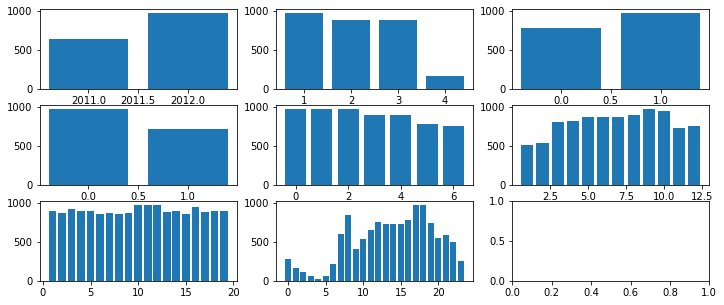

In [299]:
fig, axes = plt.subplots(nrows=3, ncols=3)
fig.set_size_inches(12, 5)
axes[0][0].bar(train_df["year"], train_df["count"])
axes[0][1].bar(train_df["weather"], train_df["count"])
axes[0][2].bar(train_df["workingday"], train_df["count"])
axes[1][0].bar(train_df["holiday"], train_df["count"])
axes[1][1].bar(train_df["weekday"], train_df["count"])
axes[1][2].bar(train_df["month"], train_df["count"])
axes[2][0].bar(train_df["day"], train_df["count"])
axes[2][1].bar(train_df["hour"], train_df["count"])
plt.show()

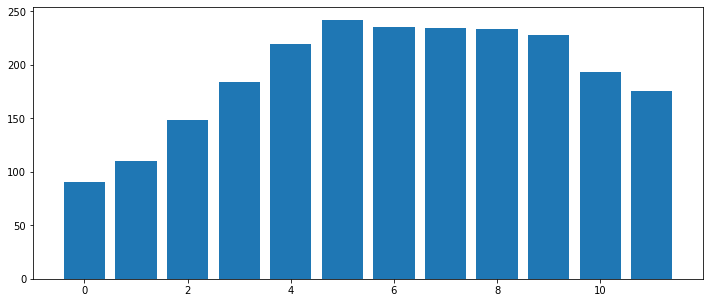

In [300]:
serires_data = train_df.groupby(["month"])["count"].mean()
serires_data.index.tolist()[:5]

fig, ax = plt.subplots()
ax.bar(range(len(serires_data)), serires_data)
fig.set_size_inches(12,5)
plt.show()

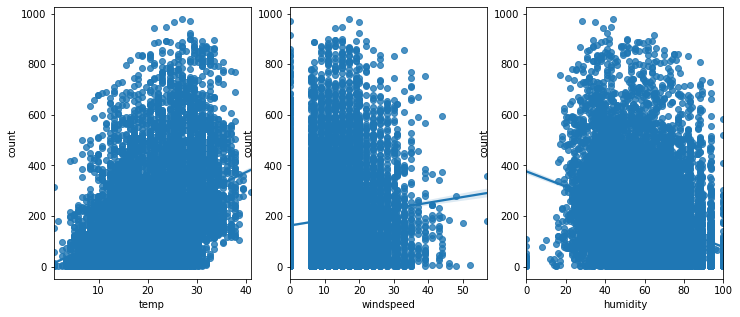

In [301]:
import seaborn as sn

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=train_df,ax=ax1)
sn.regplot(x="windspeed", y="count", data=train_df,ax=ax2)
sn.regplot(x="humidity", y="count", data=train_df,ax=ax3)
plt.show()
# windspeed에서 0이 많다. 앞에서 데이터에 NAN이 없어서 깨끗한 줄 알았는데 입력되지 않은 값들이 0으로 처리된듯
# 다른 feature와의 관계를 이용해 windspeed값을 채워주는 방법도 있음.

In [302]:
continuous_variable_list = ["temp","humidity","windspeed","atemp"]
season_list = ['season_1', 'season_2', 'season_3', 'season_4']
weather_list = ['weather_1', 'weather_2', 'weather_3', 'weather_4']
weekday_list = ['weekday_0','weekday_1','weekday_2','weekday_3','weekday_4','weekday_5','weekday_6']
category_varialbe_list = ["season","holiday","workingday","weather","weekday","month","year","hour"]

In [303]:
all_variable_list = continuous_variable_list + category_varialbe_list
all_variable_list.append(season_list)
all_variable_list.append(weather_list)
all_variable_list.append(weekday_list)
all_variable_list

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'year',
 'hour',
 ['season_1', 'season_2', 'season_3', 'season_4'],
 ['weather_1', 'weather_2', 'weather_3', 'weather_4'],
 ['weekday_0',
  'weekday_1',
  'weekday_2',
  'weekday_3',
  'weekday_4',
  'weekday_5',
  'weekday_6']]

In [304]:
variable_combinations = []
import itertools
for L in range(13, len(all_variable_list)+1):
    for subset in itertools.combinations(all_variable_list, L):
        temp = []
        for variable in subset:
            if isinstance(variable, list): # 해당 자료형이 list인지 확인하는 함수
                for value in variable:
                    temp.append(value) # list면 하나씩 빼서 담아주는 trick
            else:
                temp.append(variable)
        variable_combinations.append(temp)

len(variable_combinations)

121

In [305]:
del pre_df["count"]

In [306]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import datetime

kf= KFold(n_splits=10)

y = train_df["count"].values
final_output = []
models = []

print(len(variable_combinations))
ts = datetime.datetime.now()
for i, combination in enumerate(variable_combinations):
    lr = LinearRegression(n_jobs=8)
    ridge = Ridge()
    lasso = Lasso()
    
    lr_result = []
    ridge_result = []
    lasso_result = []
    
    target_df = pre_df[combination]
    ALL = target_df.values
    std = StandardScaler()
    std.fit(ALL)
    ALL_scaled = std.transform(ALL)
    X = ALL_scaled[train_index]
    
    for train_data_index, test_data_index in kf.split(X):
        X_train = X[train_data_index]
        X_test = X[test_data_index]
        y_train = y[train_data_index]
        y_test = y[test_data_index]
        lr.fit(X_train, y_train)
        result = rmsle(y_test, lr.predict(X_test))
        lr_result.append(result)

        ridge.fit(X_train, y_train)
        result = rmsle(y_test, ridge.predict(X_test))
        ridge_result.append(result)

        lasso.fit(X_train, y_train)
        result = rmsle(y_test, lasso.predict(X_test))
        lasso_result.append(result)
    
    final_output.append([i, np.mean(lr_result), np.mean(ridge_result), np.mean(lasso_result)])
    models.append([lr, ridge, lasso])
    # 100번이 돌 때마다 걸린 시간을 찍어줌, 모델 돌아가는 시간 측정가능.
    if i % 100 == 0:
        tf = datetime.datetime.now()
        te = tf - ts  
        print(i, te)
        ts = datetime.datetime.now()

121


<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

0 0:00:00.311910


<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

100 0:00:40.531191


<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython

<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))
<ipython-input-288-f20340366335>:4: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.log(y_ + 1))


In [307]:
labels = ["combination", "lr","ridge", "lasso"]

from pandas import DataFrame
result_df = DataFrame(final_output, columns=labels)
result_df

,combination,lr,ridge,lasso
0,0,1.325132,1.323639,1.306853
1,1,1.320023,1.318342,1.307863
2,2,1.323106,1.321924,1.310925
3,3,1.489981,1.460332,1.436101
4,4,1.463904,1.465935,1.441929
...,...,...,...,...
116,116,1.324946,1.326350,1.305956
117,117,1.322500,1.325083,1.305013
118,118,1.323217,1.324722,1.315003
119,119,1.324468,1.321814,1.304744


In [308]:
result_df.min()

combination    0.000000
lr             1.307612
ridge          1.303447
lasso          1.292406
dtype: float64

In [309]:
result_df["lasso"].sort_values().head()

8      1.292406
14     1.298411
102    1.300448
66     1.302723
68     1.302774
Name: lasso, dtype: float64

In [310]:
variable_combinations[8]

['temp',
 'humidity',
 'windspeed',
 'atemp',
 'season',
 'holiday',
 'workingday',
 'weather',
 'weekday',
 'month',
 'hour',
 'weather_1',
 'weather_2',
 'weather_3',
 'weather_4',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6']

In [311]:
target_df = pre_df[variable_combinations[8]]
ALL = target_df.values
std = StandardScaler()
std.fit(ALL)
ALL_scaled = std.transform(ALL)
X_submission_test = ALL_scaled[test_index]
X_submission_test.shape

(6493, 22)

In [312]:
X_submission_test

array([[-1.23077877, -0.34847267,  1.61850352, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -0.34847267, -1.55388851, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -0.34847267, -1.55388851, ..., -0.40865929,
        -0.41105331, -0.41009641],
       ...,
       [-1.23077877, -0.14113744, -0.21169121, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877, -0.34847267, -0.45609864, ..., -0.40865929,
        -0.41105331, -0.41009641],
       [-1.23077877,  0.11803159, -0.45609864, ..., -0.40865929,
        -0.41105331, -0.41009641]])

In [313]:
models[8][2]

Lasso()

In [314]:
final_result = models[8][2].predict(X_submission_test)
final_result[final_result < 0] = 0
final_result

array([ 13.52940802,  22.22512722,  29.58033602, ..., 195.31192991,
       212.73625388, 201.89205469])

In [315]:
pre_df.iloc[test_index]["datetime"]

10886   2011-01-20 00:00:00
10887   2011-01-20 01:00:00
10888   2011-01-20 02:00:00
10889   2011-01-20 03:00:00
10890   2011-01-20 04:00:00
                ...        
17374   2012-12-31 19:00:00
17375   2012-12-31 20:00:00
17376   2012-12-31 21:00:00
17377   2012-12-31 22:00:00
17378   2012-12-31 23:00:00
Name: datetime, Length: 6493, dtype: datetime64[ns]

In [316]:
data = {"datetime": pre_df.iloc[test_index]["datetime"], "count": final_result}
df_submission = DataFrame(data, columns=["datetime", "count"])
df_submission

,datetime,count
10886,2011-01-20 00:00:00,13.529408
10887,2011-01-20 01:00:00,22.225127
10888,2011-01-20 02:00:00,29.580336
10889,2011-01-20 03:00:00,37.033077
10890,2011-01-20 04:00:00,44.388286
...,...,...
17374,2012-12-31 19:00:00,188.421733
17375,2012-12-31 20:00:00,195.776942
17376,2012-12-31 21:00:00,195.311930
17377,2012-12-31 22:00:00,212.736254
